In [5]:
import pandas as pd
import numpy as np

In [6]:
df_train=pd.read_csv('C:\Capstone Project\Integrated project\sign_mnist_train.csv')
df_test=pd.read_csv('C:\Capstone Project\Integrated project\sign_mnist_test.csv')
y_train=df_train['label'].values
y_test=df_test['label'].values
df_train.drop('label',axis=1,inplace=True)
df_test.drop('label',axis=1,inplace=True)
df_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
x_train=df_train.values
x_test=df_test.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [8]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [9]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [11]:
from sklearn.preprocessing import LabelBinarizer
lb_train= LabelBinarizer()
lb_test=LabelBinarizer()
y_train=lb_train.fit_transform(y_train)
y_test=lb_test.fit_transform(y_test)

In [12]:
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


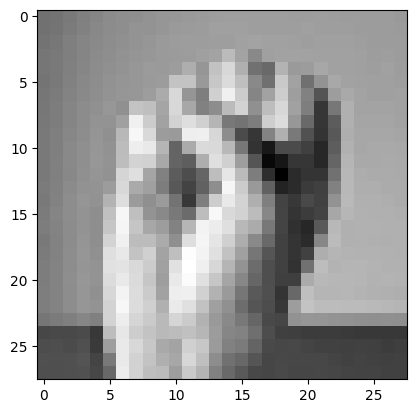

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10].reshape(28,28),cmap='gray')

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [16]:
batch_size = 128
num_classes = 24
epochs = 100


In [17]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

c:\Capstone Project\Integrated project\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [19]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - accuracy: 0.1055 - loss: 2.9644 - val_accuracy: 0.5901 - val_loss: 1.3971
Epoch 2/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.5430 - loss: 1.3376 - val_accuracy: 0.7158 - val_loss: 0.8271
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.7010 - loss: 0.8494 - val_accuracy: 0.8005 - val_loss: 0.5556
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.7813 - loss: 0.6321 - val_accuracy: 0.8415 - val_loss: 0.4475
Epoch 5/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.8279 - loss: 0.4866 - val_accuracy: 0.8692 - val_loss: 0.3696
Epoch 6/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8559 - loss: 0.4066 - val_accuracy: 0.8714 - val_loss: 0.3318
Epoch 7/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.8896 - loss: 0.3220 - val_accuracy: 0.8933 - val_loss: 0.3030
Epoch 8/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9075 - loss: 0

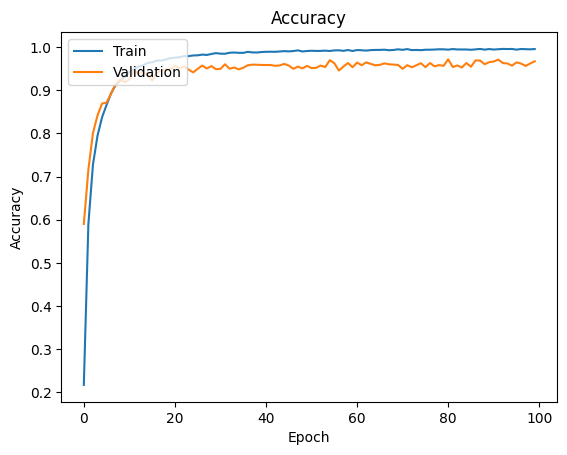

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()


In [21]:
import cv2
from keras.preprocessing.image import img_to_array
alphabet=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba=model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

In [22]:
classify(x_train[3]*255)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


'C'

In [23]:
print(y_train[3])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


: 

Epoch 1/20


c:\Capstone Project\Integrated project\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


344/344 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2274 - loss: 2.6178 - val_accuracy: 0.8456 - val_loss: 0.5947
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7434 - loss: 0.7912 - val_accuracy: 0.9594 - val_loss: 0.2068
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8640 - loss: 0.4046 - val_accuracy: 0.9894 - val_loss: 0.0761
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9191 - loss: 0.2497 - val_accuracy: 0.9973 - val_loss: 0.0314
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9422 - loss: 0.1712 - val_accuracy: 0.9980 - val_loss: 0.0186
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9557 - loss: 0.1320 - val_accuracy: 0.9991 - val_loss: 0.0087
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9662 - loss: 0.1037 - val_accuracy: 0.9998 - val_loss: 0.0052
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9692 - loss: 0.0893 - val_accuracy: 0.999

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.95      0.98       432
           2       1.00      1.00      1.00       310
           3       0.96      1.00      0.98       245
           4       1.00      0.95      0.98       498
           5       1.00      1.00      1.00       247
           6       0.91      0.93      0.92       348
           7       0.95      0.95      0.95       436
           8       0.88      0.86      0.87       288
          10       0.91      0.98      0.95       331
          11       0.97      1.00      0.99       209
          12       0.91      0.98      0.95       394
          13       1.00      0.73      0.84       291
          14       1.00      0.97      0.99       246
          15       0.95      1.00      0.98       347
          16       0.96      1.00      0.98       164
          17       0.93      0.57      0.71       144
          18       0.83    

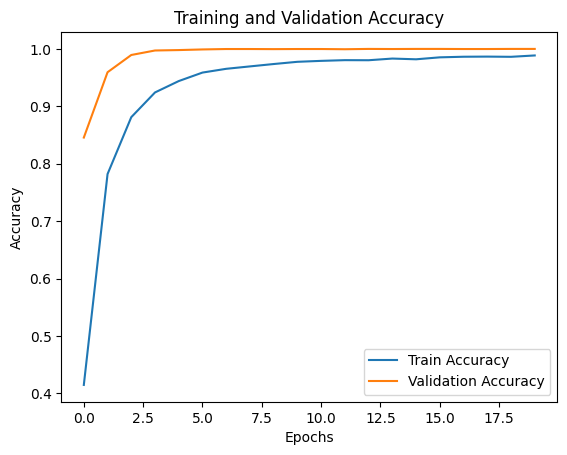

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load training dataset
train_data = pd.read_csv("C:\Capstone Project\Integrated project\sign_mnist_train.csv")

def preprocess_images(data):
    images = data.iloc[:, 1:].values.reshape(-1, 28, 28, 1)  # Reshape to 28x28x1
    images = images / 255.0  # Normalize to range [0, 1]
    return images

def preprocess_labels(data):
    labels = data.iloc[:, 0].values  # Extract labels
    labels = tf.keras.utils.to_categorical(labels, num_classes=25)  # One-hot encode
    return labels

# Preprocess training data
x_train = preprocess_images(train_data)
y_train = preprocess_labels(train_data)

# Split training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64,
    verbose=1
)

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Load and preprocess testing dataset
test_data = pd.read_csv("C:\Capstone Project\Integrated project\sign_mnist_test.csv")
x_test = preprocess_images(test_data)
y_test = preprocess_labels(test_data)

# Evaluate on testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report and confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Save the trained model
model.save("enhanced_asl_model.h5")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [25]:
model.save("asl_model.h5")